Article: The Poisson distribution model fits UMI‑based single‑cell RNA‑sequencing data

Pan et al., 2023, BMC Bioinformatics

https://doi.org/10.1186/s12859-023-05349-2

Figure 1A-C

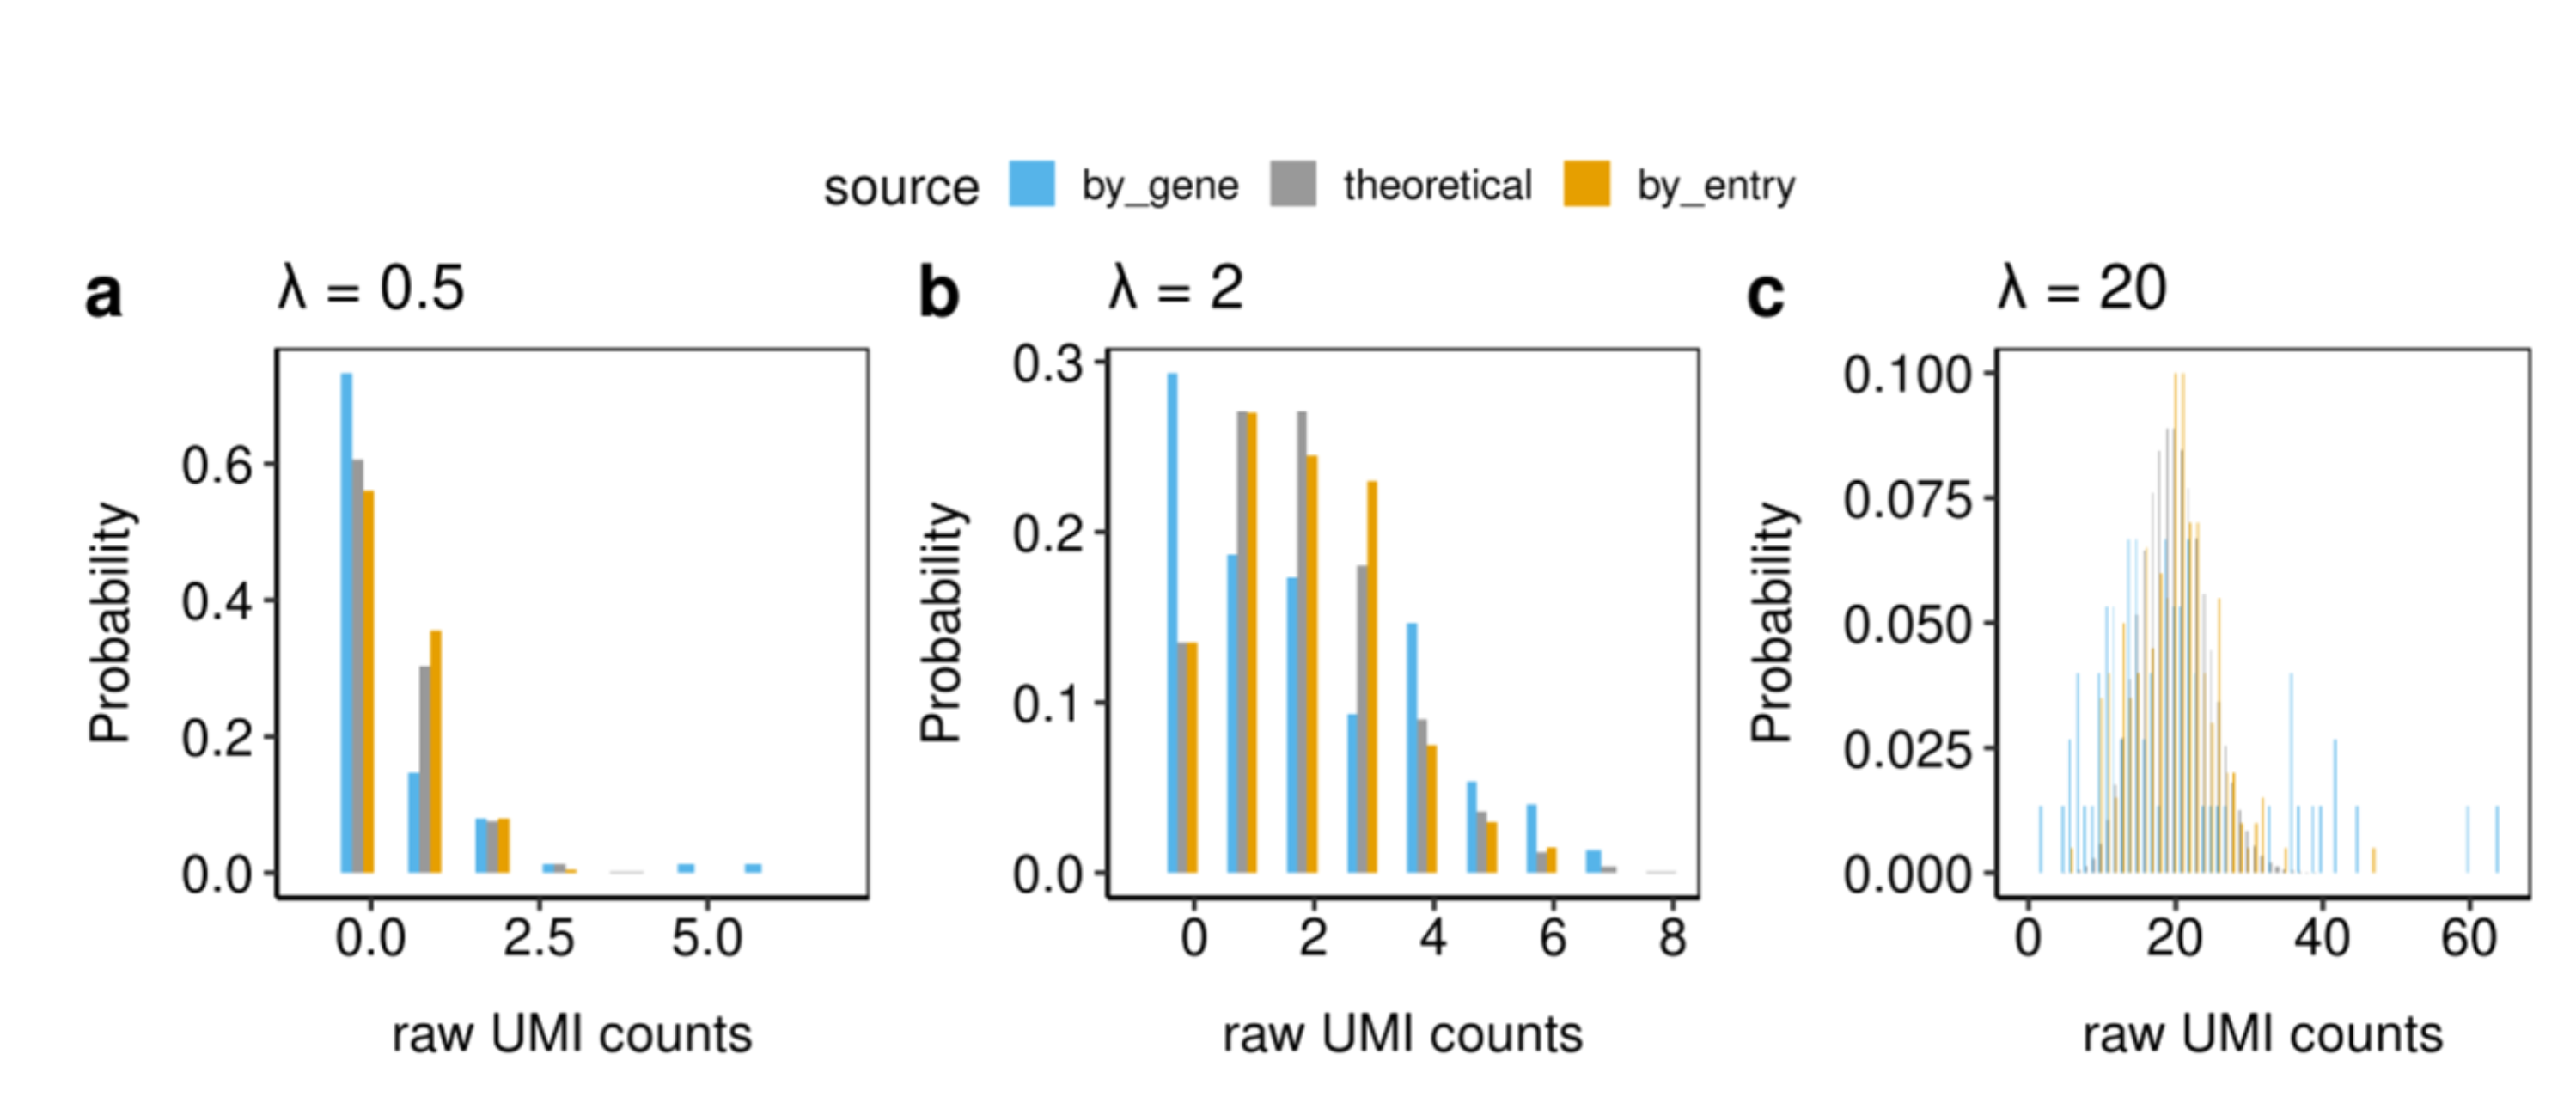


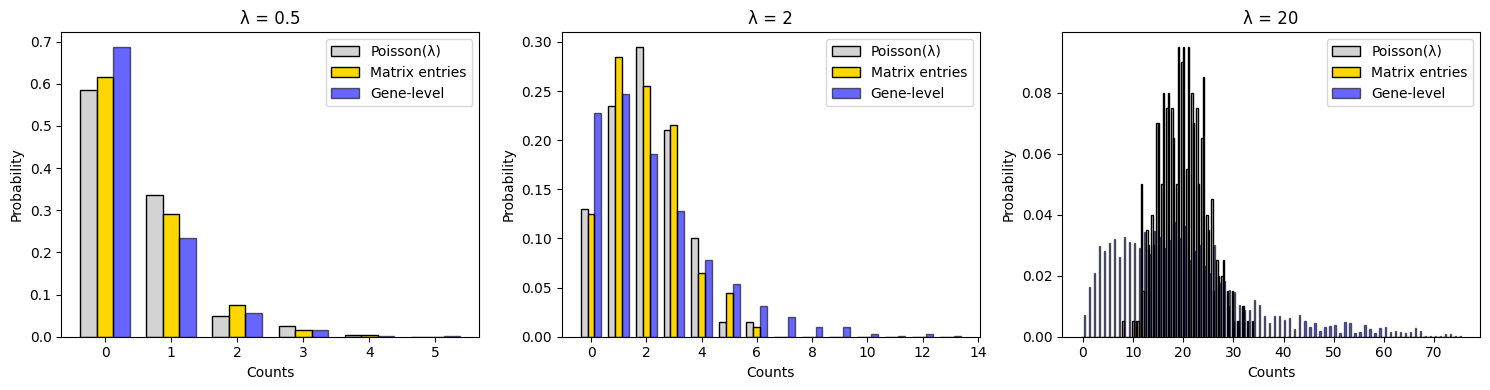

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def simulate_panel(lam, n_entries=200, n_genes=50, n_cells=50):
    """Simulate Poisson-like scRNA-seq data for one subplot."""
    # Gold: Entry-level Poisson counts
    gold_counts = np.random.poisson(lam, size=n_entries)
    # Gray: Perfect Poisson(λ)
    gray_counts = np.random.poisson(lam, size=n_entries)
    # Blue: Gene-level counts with extra variability
    gene_means = np.random.gamma(shape=2, scale=lam/2, size=n_genes)
    blue_counts = []
    for gm in gene_means:
        blue_counts.extend(np.random.poisson(gm, size=n_cells))
    blue_counts = np.array(blue_counts)
    return gold_counts, gray_counts, blue_counts

def plot_clustered_hist(lam, gold, gray, blue, ax):
    """Plot clustered histograms normalized as probabilities."""
    max_count = max(gold.max(), gray.max(), blue.max()) + 1
    bins = np.arange(0, max_count + 1, 1)

    # Compute histogram probabilities
    gold_vals, _ = np.histogram(gold, bins=bins)
    gray_vals, _ = np.histogram(gray, bins=bins)
    blue_vals, _ = np.histogram(blue, bins=bins)

    gold_vals = gold_vals / gold_vals.sum()
    gray_vals = gray_vals / gray_vals.sum()
    blue_vals = blue_vals / blue_vals.sum()

    # Positions for clustered bars
    x = bins[:-1]
    width = 0.25

    ax.bar(x - width, gray_vals, width=width, color='lightgray',
           edgecolor='black', label='Poisson(λ)')
    ax.bar(x, gold_vals, width=width, color='gold',
           edgecolor='black', label='Matrix entries')
    ax.bar(x + width, blue_vals, width=width, color='blue',
           edgecolor='black', alpha=0.6, label='Gene-level')

    ax.set_title(f'λ = {lam}')
    ax.set_xlabel('Counts')
    ax.set_ylabel('Probability')
    ax.legend()

# Simulate and plot
lams = [0.5, 2, 20]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, lam in zip(axes, lams):
    gold, gray, blue = simulate_panel(lam)
    plot_clustered_hist(lam, gold, gray, blue, ax)

plt.tight_layout()
plt.show()